## Assignment 3

Name         : Daniel

Student Code : PYTN053ONL006

Topic        : Bank Marketing Dataset

## Import Libraries

In [1]:
from sklearn import metrics
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

## Data Loading & Exploratory Data Analysis

In [2]:
df = pd.read_csv('dataset/bank.csv' )
df.head()

,"age;""job"";""marital"";""education"";""default"";""balance"";""housing"";""loan"";""contact"";""day"";""month"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""y"""
0,"30;""unemployed"";""married"";""primary"";""no"";1787;..."
1,"33;""services"";""married"";""secondary"";""no"";4789;..."
2,"35;""management"";""single"";""tertiary"";""no"";1350;..."
3,"30;""management"";""married"";""tertiary"";""no"";1476..."
4,"59;""blue-collar"";""married"";""secondary"";""no"";0;..."


In [3]:
df = pd.read_csv('dataset/bank.csv', sep=';' )
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [4]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no
4520,44,entrepreneur,single,tertiary,no,1136,yes,yes,cellular,3,apr,345,2,249,7,other,no


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [6]:
# Check missing values
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [7]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [8]:
df.shape

(4521, 17)

In [9]:
# Rename columns 'y' to 'deposit'
df.rename(columns={'y': 'deposit'}, inplace=True)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


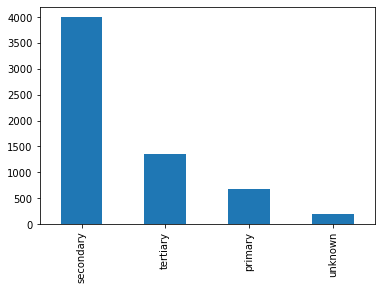

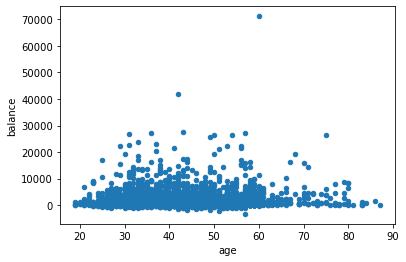

In [10]:
# Data Visualization
deposit_plot = df["deposit"].value_counts().plot(kind='bar')
print(deposit_plot)
edu_plot = df["education"].value_counts().plot(kind='bar')
print(edu_plot)
scatter = df.plot(kind='scatter',x='age',y='balance')
print(scatter)

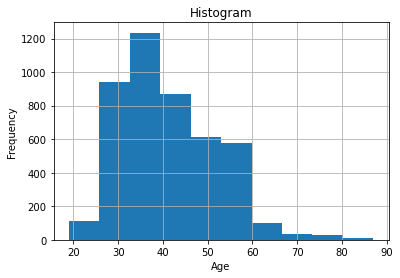

In [11]:
# Age distribution
df.age.hist()
plt.title('Histogram')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('age_distribution')

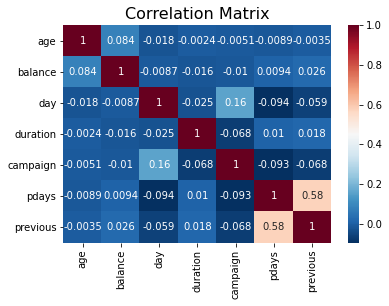

In [12]:
# Checking feature Correlations
cor = df.corr()
num_df = df.select_dtypes(exclude="object")
corr_num = num_df.corr()
sns.heatmap(corr_num, annot=True, cmap="RdBu_r")
plt.title("Correlation Matrix", fontsize=16)
plt.show()

## Data Preprocessing

In [13]:
# Encoding Target variable
target = {"deposit":     {"yes": 1, "no": 0}}
df1 = df.replace(target)
df1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,0
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,0
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,0
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,0


In [14]:
# assignning new data set
# dropping columns with high correlation to target
df2 = df1.drop(["duration"],axis=1) #cor>0.40

In [15]:
# Checking of missing value
count_nan = df2.isnull().sum()
print(count_nan[count_nan>0]) #no missing values

Series([], dtype: int64)


In [16]:
# Targert variable count
y_counts = df2["deposit"].value_counts()
print(y_counts)

0    4000
1     521
Name: deposit, dtype: int64


In [17]:
# Encoding Categorichal values
data = pd.get_dummies(df2, columns=["job","marital","education","default","housing","loan","contact","month","poutcome" ])
data.describe

<bound method NDFrame.describe of       age  balance  day  campaign  pdays  previous  deposit  job_admin.  \
0      30     1787   19         1     -1         0        0           0   
1      33     4789   11         1    339         4        0           0   
2      35     1350   16         1    330         1        0           0   
3      30     1476    3         4     -1         0        0           0   
4      59        0    5         1     -1         0        0           0   
...   ...      ...  ...       ...    ...       ...      ...         ...   
4516   33     -333   30         5     -1         0        0           0   
4517   57    -3313    9         1     -1         0        0           0   
4518   57      295   19        11     -1         0        0           0   
4519   28     1137    6         4    211         3        0           0   
4520   44     1136    3         2    249         7        0           0   

      job_blue-collar  job_entrepreneur  ...  month_jun  month_ma

In [18]:
# Splitting data for training and testing

X = data.drop('deposit', axis=1)
y = data['deposit']

In [19]:
# Create training and testing variables
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(3164, 50) (3164,)
(1357, 50) (1357,)


### The Decision Tree Classifier

In [20]:
# Create Decision Tree classifer object
dc = DecisionTreeClassifier()
# Train Decision Tree Classifer
dc.fit(X_train, y_train)

DecisionTreeClassifier()

In [21]:
#Predict the response for test dataset
dc_pred = dc.predict(X_test)

# model Evaluation
print("Accuracy:",metrics.accuracy_score(y_test, dc_pred))

# Classification Report & Confusion matrix
print(confusion_matrix(dc_pred, y_test))
print(classification_report(y_test, dc_pred))

Accuracy: 0.8187177597641857
[[1074  114]
 [ 132   37]]
              precision    recall  f1-score   support

           0       0.90      0.89      0.90      1206
           1       0.22      0.25      0.23       151

    accuracy                           0.82      1357
   macro avg       0.56      0.57      0.56      1357
weighted avg       0.83      0.82      0.82      1357



### The KNN Classifier

In [22]:
# build model
knn_model = KNeighborsClassifier(n_neighbors=5)
# fit classifiers
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [23]:
# Prediction
knn_pred = knn_model.predict(X_test)

# model Evaluation
print("Accuracy:",accuracy_score(knn_pred, y_test))
# Classification Report & Confusion matrix
print(confusion_matrix(knn_pred, y_test))
print(classification_report(knn_pred, y_test))

Accuracy: 0.8798820928518791
[[1185  142]
 [  21    9]]
              precision    recall  f1-score   support

           0       0.98      0.89      0.94      1327
           1       0.06      0.30      0.10        30

    accuracy                           0.88      1357
   macro avg       0.52      0.60      0.52      1357
weighted avg       0.96      0.88      0.92      1357



### The SVM Classifier

In [24]:
# build model
svm_model = svm.SVC()
# fit classifiers
svm_model.fit(X_train, y_train)

SVC()

In [25]:
# Prediction
svm_pred = svm_model.predict(X_test)

# model Evaluation
print("Accuracy:",accuracy_score(svm_pred, y_test))
# Classification Report & Confusion matrix
print(confusion_matrix(svm_pred, y_test))
print(classification_report(svm_pred, y_test))

Accuracy: 0.8887251289609432
[[1206  151]
 [   0    0]]
              precision    recall  f1-score   support

           0       1.00      0.89      0.94      1357
           1       0.00      0.00      0.00         0

    accuracy                           0.89      1357
   macro avg       0.50      0.44      0.47      1357
weighted avg       1.00      0.89      0.94      1357



### The Logistic Regression Classifier

In [26]:
# build model
lg_model = LogisticRegression()
# fit classifiers
lg_model.fit(X_train, y_train)

LogisticRegression()

In [27]:
# Prediction
lg_pred = lg_model.predict(X_test)

# model Evaluation
print('Accuracy of logistic regression: {:.2f}'.format(lg_model.score(X_test, y_test)))
# confusion matrix
confusion_matrix = confusion_matrix(y_test, lg_pred)
print(confusion_matrix)
# Classification Report
print(classification_report(y_test, lg_pred))

Accuracy of logistic regression: 0.89
[[1202    4]
 [ 147    4]]
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      1206
           1       0.50      0.03      0.05       151

    accuracy                           0.89      1357
   macro avg       0.70      0.51      0.50      1357
weighted avg       0.85      0.89      0.84      1357



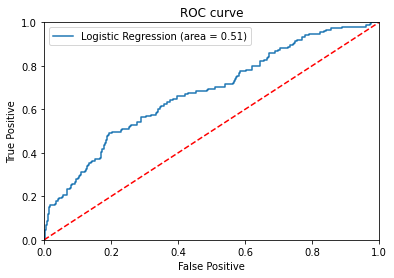

In [28]:
# ROC Curve for LG Model

lg_roc_auc = roc_auc_score(y_test, lg_model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, lg_model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % lg_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('ROC curve')
plt.legend(loc="upper left")
plt.savefig('Lg_model_ROC curve')
plt.show()

### The Random Forest Classifier

In [29]:
# build model
rf_model = RandomForestClassifier(n_estimators=100)
# Fitting the classifier
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

In [30]:
# model Evaluation
print("Accuracy:", metrics.accuracy_score(y_test, rf_pred))
# Classification Report & Confusion matrix
print(classification_report(y_test, rf_pred))

Accuracy: 0.8931466470154753
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      1206
           1       0.60      0.12      0.20       151

    accuracy                           0.89      1357
   macro avg       0.75      0.55      0.57      1357
weighted avg       0.87      0.89      0.86      1357



<AxesSubplot:>

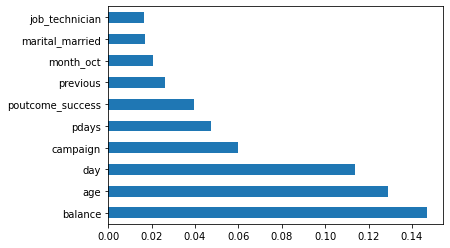

In [31]:
# Feature importance in randomforestRandomForestClassfier
rf_model.feature_importances_ 
# Plot of importances
feat_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')

### Insight :
The SVM, Logistic Regression and Random Forest Classifier have the same accuracy = 0.88 achieved the highest performance scores in predicting target class labels.